All data present
R-Squared: 0.6162
The prediction for LSTAT = 30 & RM = 5 is: 4.7569


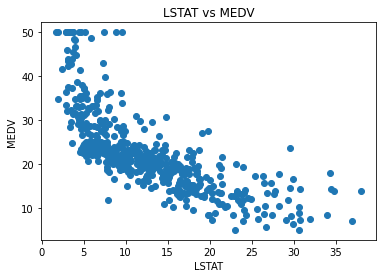

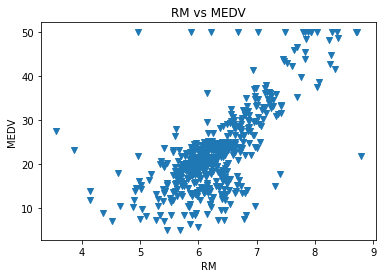

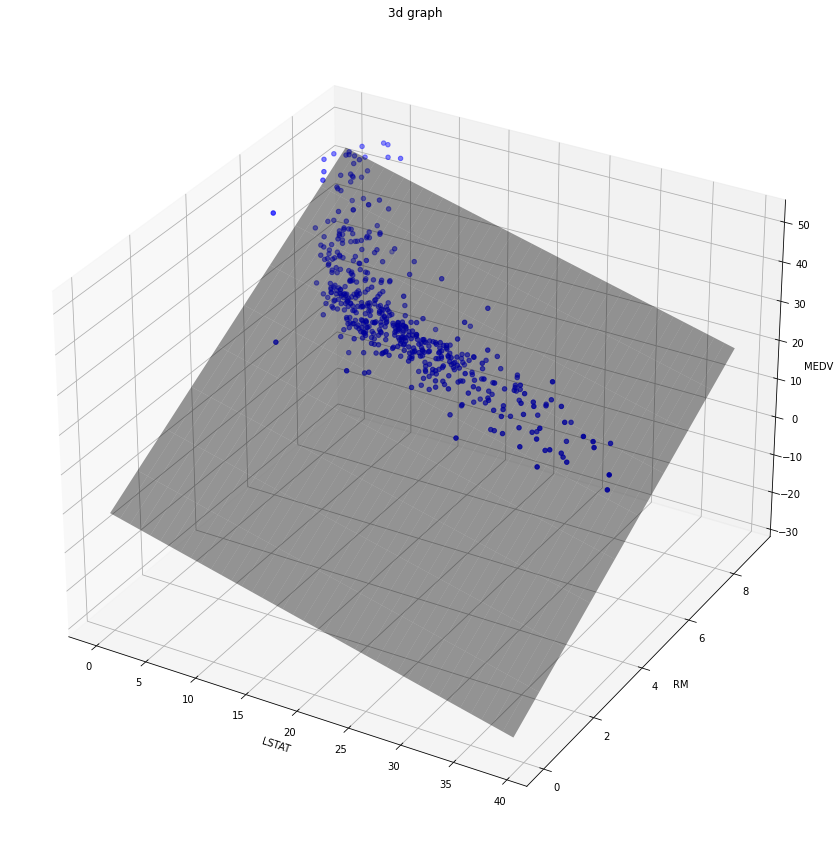

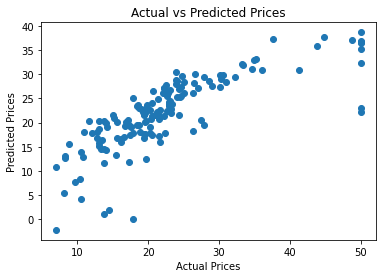

In [49]:
#Linear Regression Practice

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#importing data
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV']= dataset.target

#cleaning up data
missing = False
for x in range(0,len(df.isnull().sum())):
    if df.isnull().sum()[x] != 0 :
        missing = True
        break
        
if missing == True:
    print("DATA MISSING")
    exit()
else:
    print("All data present")
    
#there is no missing data, so we are good to go
#finding the correlations
corr = df.corr()

Index = df.corr().abs().nlargest(3, 'MEDV').index
Correlations = df.corr().abs().nlargest(3, 'MEDV').values[:,13]

#plotting the data
plt.figure(0)
plt.scatter(df[Index[1]], df['MEDV'], marker = 'o')
plt.xlabel(Index[1])
plt.ylabel('MEDV')
plt.title(Index[1] + " vs MEDV")

plt.figure(1)
plt.scatter(df[Index[2]], df['MEDV'], marker = 'v')
plt.xlabel(Index[2])
plt.ylabel('MEDV')
plt.title(Index[2] + " vs MEDV")

#3d chart
fig = plt.figure(figsize =(18,15))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df[Index[1]], df[Index[2]], df['MEDV'],c='b')
ax.set_xlabel(Index[1])
ax.set_ylabel(Index[2])
ax.set_zlabel(Index[0])
ax.set_title("3d graph")

#training the model
X = pd.DataFrame(np.c_[df[Index[1]], df[Index[2]]], columns = [Index[1], Index[2]])
Y = df['MEDV']
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

model = LinearRegression()
model.fit(x_train, Y_train)

#perform predictions
price_pred = model.predict(x_test)
print('R-Squared: %.4f' % model.score(x_test, Y_test))
plt.figure(3)
plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

intercepts = model.intercept_
coeffs = model.coef_

print("The prediction for LSTAT = 30 & RM = 5 is: %.4f" % model.predict([[30,5]]))

#plotting the resulting 3d hyperplane (adds on to previous 3d graph)

#create a meshgrid of all values for LSTAT and RM
x_surf = np.arange(0,40,1)
y_surf = np.arange(0,10,1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
model.fit(X,Y)
z= lambda x,y: (model.intercept_ + model.coef_[0] *x +  model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), rstride=1, cstride=1, color='None', alpha = 0.4)
plt.show()